In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


In [2]:
#loading the data
dementia_df = pd.read_csv('dementia.csv')

In [3]:
dementia_df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [4]:
#Get the sum of null values
dementia_df.isnull().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64

In [5]:
# Separate numerical and categorical features
numerical_features = dementia_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = dementia_df.select_dtypes(include=['object']).columns


In [6]:
#List numerical_features and categorical_features
print(numerical_features)
print()
print(categorical_features)

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Dosage in mg', 'Age',
       'Cognitive_Test_Scores', 'Dementia'],
      dtype='object')

Index(['Prescription', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Medication_History', 'Nutrition_Diet',
       'Sleep_Quality', 'Chronic_Health_Conditions'],
      dtype='object')


In [7]:
# Fill numerical features with median **Impute Numerical Features (Median)**
numerical_imputer = SimpleImputer(strategy='median')
dementia_df[numerical_features] = numerical_imputer.fit_transform(dementia_df[numerical_features])

In [8]:
# 2. Encode categorical features
# Encode categorical features
for col in categorical_features:
    dementia_df[col] = dementia_df[col].astype('category').cat.codes

# Apply KNN Imputation to fill categorical features
knn_imputer = KNNImputer(n_neighbors=5)
dementia_df = pd.DataFrame(knn_imputer.fit_transform(dementia_df), columns=dementia_df.columns)
dementia_df.head()


,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1.0,0.084974,98.0,96.230743,36.224852,57.563978,36.421028,-1.0,8.0,60.0,...,0.0,0.0,2.0,0.0,10.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.016973,78.0,93.032122,36.183874,56.832335,31.157633,1.0,12.0,61.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.009000,89.0,93.566504,37.326321,59.759066,37.640435,-1.0,8.0,69.0,...,1.0,0.0,1.0,0.0,8.0,0.0,2.0,1.0,1.0,0.0
3,0.0,0.086437,60.0,93.906510,37.030620,58.266471,50.673992,0.0,23.0,78.0,...,2.0,0.0,0.0,1.0,5.0,1.0,0.0,1.0,2.0,1.0
4,1.0,0.150747,67.0,97.508994,36.062121,67.705027,27.810601,2.0,20.0,77.0,...,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [9]:
# Decode categorical features
for col in categorical_features:
    dementia_df[col] = dementia_df[col].round().astype(int).astype('category')
dementia_df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1.0,0.084974,98.0,96.230743,36.224852,57.563978,36.421028,-1,8.0,60.0,...,0,0,2,0,10.0,0,1,1,0,0.0
1,0.0,0.016973,78.0,93.032122,36.183874,56.832335,31.157633,1,12.0,61.0,...,1,1,1,0,1.0,1,1,1,1,1.0
2,0.0,0.009000,89.0,93.566504,37.326321,59.759066,37.640435,-1,8.0,69.0,...,1,0,1,0,8.0,0,2,1,1,0.0
3,0.0,0.086437,60.0,93.906510,37.030620,58.266471,50.673992,0,23.0,78.0,...,2,0,0,1,5.0,1,0,1,2,1.0
4,1.0,0.150747,67.0,97.508994,36.062121,67.705027,27.810601,2,20.0,77.0,...,2,1,0,0,0.0,1,1,0,0,1.0


In [10]:
# Verify there are no missing values remaining
print(dementia_df.isnull().sum())

Diabetic                     0
AlcoholLevel                 0
HeartRate                    0
BloodOxygenLevel             0
BodyTemperature              0
Weight                       0
MRI_Delay                    0
Prescription                 0
Dosage in mg                 0
Age                          0
Education_Level              0
Dominant_Hand                0
Gender                       0
Family_History               0
Smoking_Status               0
APOE_ε4                      0
Physical_Activity            0
Depression_Status            0
Cognitive_Test_Scores        0
Medication_History           0
Nutrition_Diet               0
Sleep_Quality                0
Chronic_Health_Conditions    0
Dementia                     0
dtype: int64


In [11]:
dementia_df.describe

<bound method NDFrame.describe of      Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0         1.0      0.084974       98.0         96.230743        36.224852   
1         0.0      0.016973       78.0         93.032122        36.183874   
2         0.0      0.009000       89.0         93.566504        37.326321   
3         0.0      0.086437       60.0         93.906510        37.030620   
4         1.0      0.150747       67.0         97.508994        36.062121   
..        ...           ...        ...               ...              ...   
995       1.0      0.081825       87.0         93.851963        36.495134   
996       1.0      0.145249       97.0         94.522391        36.270804   
997       1.0      0.073692       65.0         98.578388        37.065703   
998       0.0      0.037347       71.0         91.298580        37.037202   
999       0.0      0.085969       90.0         95.522825        36.026748   

        Weight  MRI_Delay Prescription  D

In [12]:
#describe some categorical variable
categorical_columns = ['Depression_Status', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions', 'Prescription',
                      'Smoking_Status', 'APOE_ε4']
for column in categorical_columns:
    #count the occurence of the unique value in each column
    value_counts = dementia_df[column].value_counts()
    #print the value counts for the column
    print("value counts for the column '{}'".format(column))
    print(value_counts)

value counts for the column 'Depression_Status'
Depression_Status
0    755
1    245
Name: count, dtype: int64
value counts for the column 'Medication_History'
Medication_History
1    514
0    486
Name: count, dtype: int64
value counts for the column 'Nutrition_Diet'
Nutrition_Diet
2    338
0    332
1    330
Name: count, dtype: int64
value counts for the column 'Sleep_Quality'
Sleep_Quality
1    534
0    466
Name: count, dtype: int64
value counts for the column 'Chronic_Health_Conditions'
Chronic_Health_Conditions
0     513
-1    179
1     155
2     153
Name: count, dtype: int64
value counts for the column 'Prescription'
Prescription
-1    515
2     128
1     125
3     119
0     113
Name: count, dtype: int64
value counts for the column 'Smoking_Status'
Smoking_Status
1    458
2    452
0     90
Name: count, dtype: int64
value counts for the column 'APOE_ε4'
APOE_ε4
1    694
0    306
Name: count, dtype: int64


<Axes: >

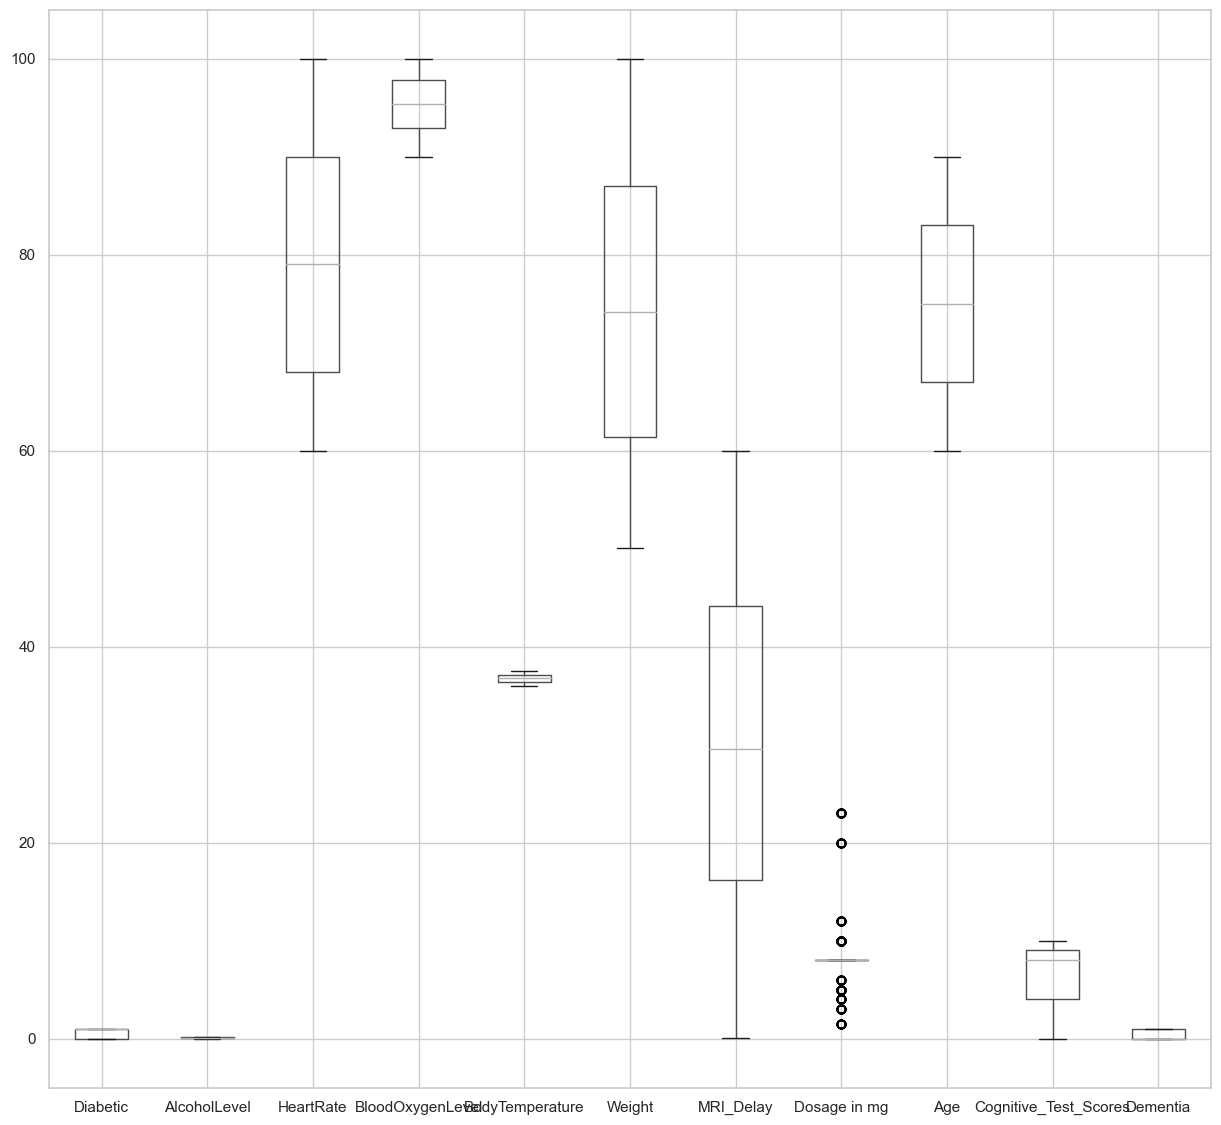

In [13]:
#checking for outliers
outliers = dementia_df
sns.set(style='whitegrid')
outliers.boxplot(figsize=(15, 14))

In [14]:
# I commented this out because In the provided KNN imputation code, categorical columns were encoded using .cat.codes, effectively converting categories into integers before applying imputation.
#After imputation, the data for these columns is still numeric, meaning they’re already encoded and ready for machine learning models.


# YOU CAN CHOOSE TO DELETE THIS CELL IF YOU WANT - ITS ADVISABLE THOUGH


# # Select the categorical columns to be encoded
# categorical_columns = ['Physical_Activity', 'Depression_Status', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions', 'Prescription',
#                       'Smoking_Status', 'APOE_ε4', 'Education_Level', 'Dominant_Hand', 'Gender', 'Family_History']
# # Initialize the OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()

# # Fit and transform the categorical columns
# dementia_df[categorical_columns] = ordinal_encoder.fit_transform(dementia_df[categorical_columns])

# # Print the first few rows of the DataFrame
# dementia_df.head()

In [15]:
#Extracting input and output data
X=dementia_df.drop('Dementia',axis=1)
y=dementia_df.iloc[:,23]
X.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions
0,1.0,0.084974,98.0,96.230743,36.224852,57.563978,36.421028,-1,8.0,60.0,...,0,0,0,2,0,10.0,0,1,1,0
1,0.0,0.016973,78.0,93.032122,36.183874,56.832335,31.157633,1,12.0,61.0,...,0,1,1,1,0,1.0,1,1,1,1
2,0.0,0.009000,89.0,93.566504,37.326321,59.759066,37.640435,-1,8.0,69.0,...,1,1,0,1,0,8.0,0,2,1,1
3,0.0,0.086437,60.0,93.906510,37.030620,58.266471,50.673992,0,23.0,78.0,...,1,2,0,0,1,5.0,1,0,1,2
4,1.0,0.150747,67.0,97.508994,36.062121,67.705027,27.810601,2,20.0,77.0,...,1,2,1,0,0,0.0,1,1,0,0


In [16]:
print(y.value_counts())

Dementia
0.0    515
1.0    485
Name: count, dtype: int64


In [17]:
#normalize the input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [18]:
# splittig the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Step 1: defining the classification models 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()

In [20]:
#training the models
RF.fit(X_train, y_train)
DT.fit(X_train, y_train)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
print(y_train)

541    0.0
440    0.0
482    0.0
422    0.0
778    0.0
      ... 
106    1.0
270    0.0
860    0.0
435    0.0
102    1.0
Name: Dementia, Length: 700, dtype: float64


In [22]:
SVM.fit(X_train, y_train)

SVC()

In [23]:
#Step 3: prediction
y_pred_RF=RF.predict(X_test)
y_pred_KNN=KNN.predict(X_test)
y_pred_DT=DT.predict(X_test)
y_pred_SVM=SVM.predict(X_test)

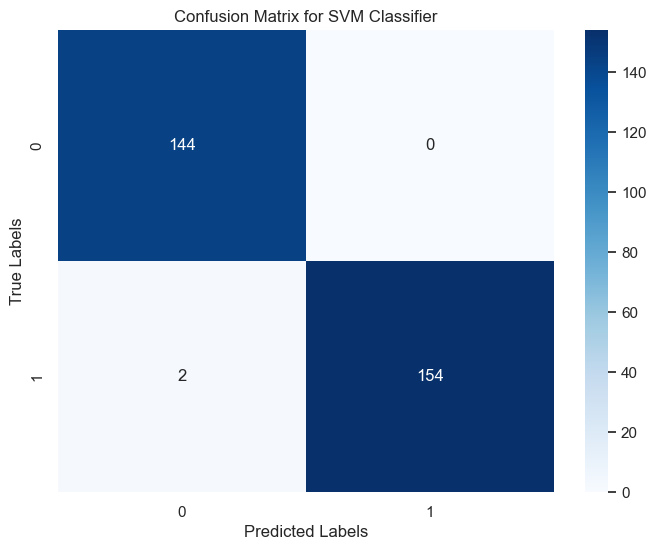

In [24]:
#create and plot confusion matrix for SVM Classifier
cm_svm = confusion_matrix(y_test, y_pred_SVM)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

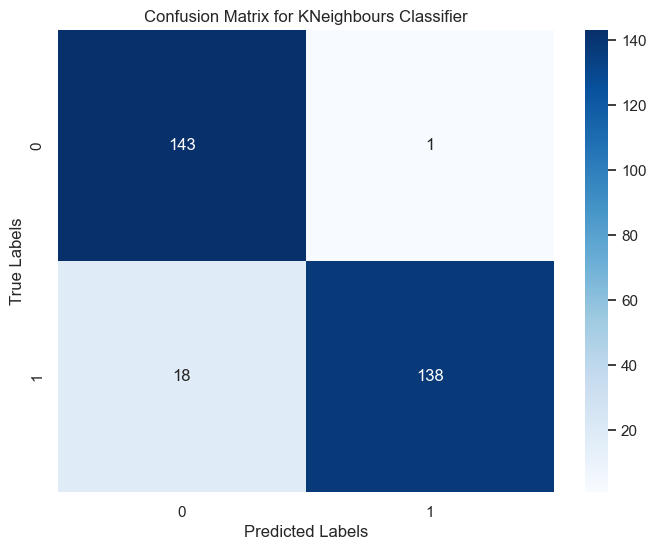

In [25]:
#create and plot confusion matrix for KNeighbours Classifier
cm_knn = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for KNeighbours Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

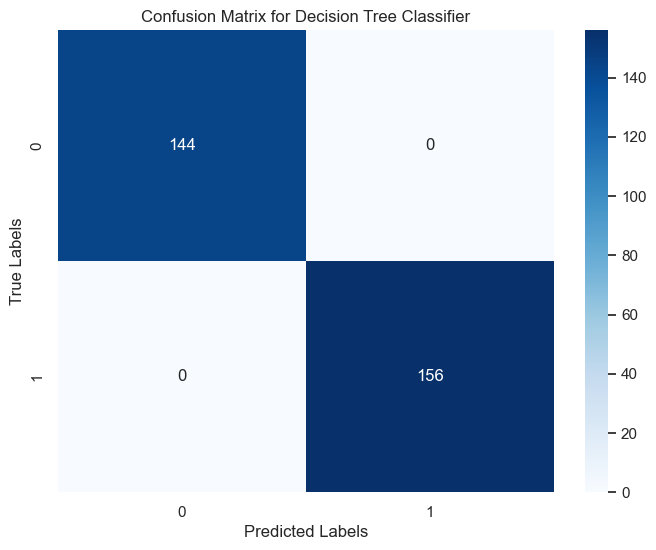

In [26]:
#create and plot confusion matrix for Decision Tree Classifier
cm_dt = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

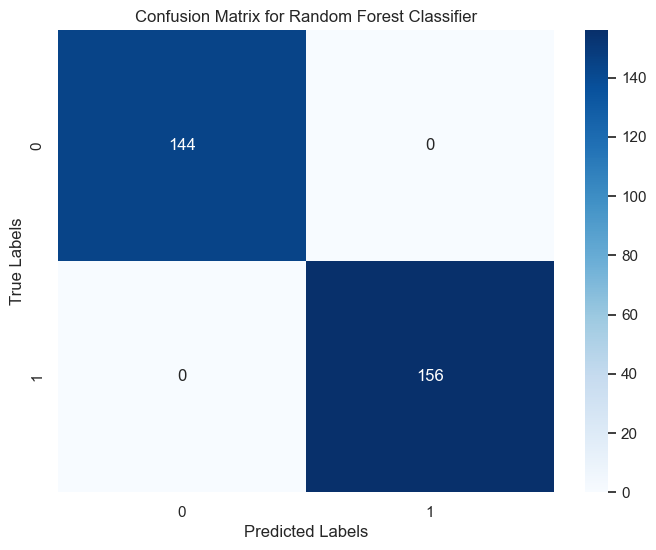

In [27]:
#create and plot confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [28]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [29]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm_svm)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm_rf)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm_dt)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm_knn)
print('\n\n')

SVM metrics

True Positives: 154
True Negatives: 144
False Positives: 0
False Negatives: 2
--------------------------------------------------
Accuracy: 0.99
Mis-Classification: 0.01
Sensitivity: 0.99
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.99



RF metrics

True Positives: 156
True Negatives: 144
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0



DT metrics

True Positives: 156
True Negatives: 144
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0



KNN metrics

True Positives: 138
True Negatives: 143
False Positives: 1
False Negatives: 18
--------------------------------------------------
Accuracy: 0.94
Mis-Classification: 0.06
Sensitivity: 0.88
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.94





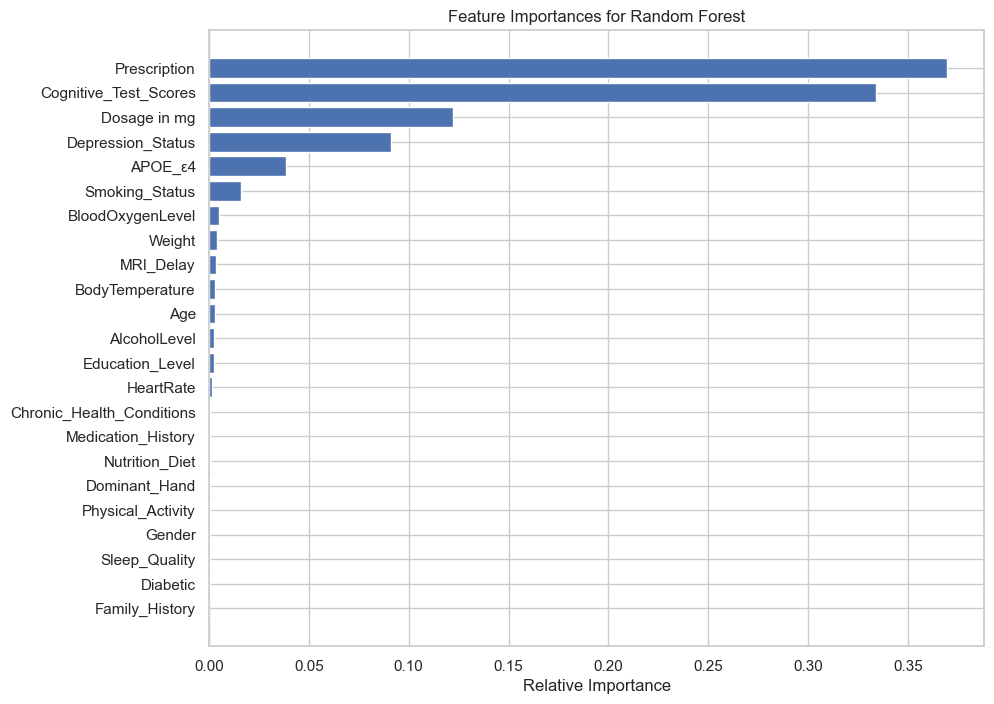

In [30]:
# Getting the most important features for Random Forest
features = dementia_df.columns
importances = RF.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 8))
plt.title('Feature Importances for Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

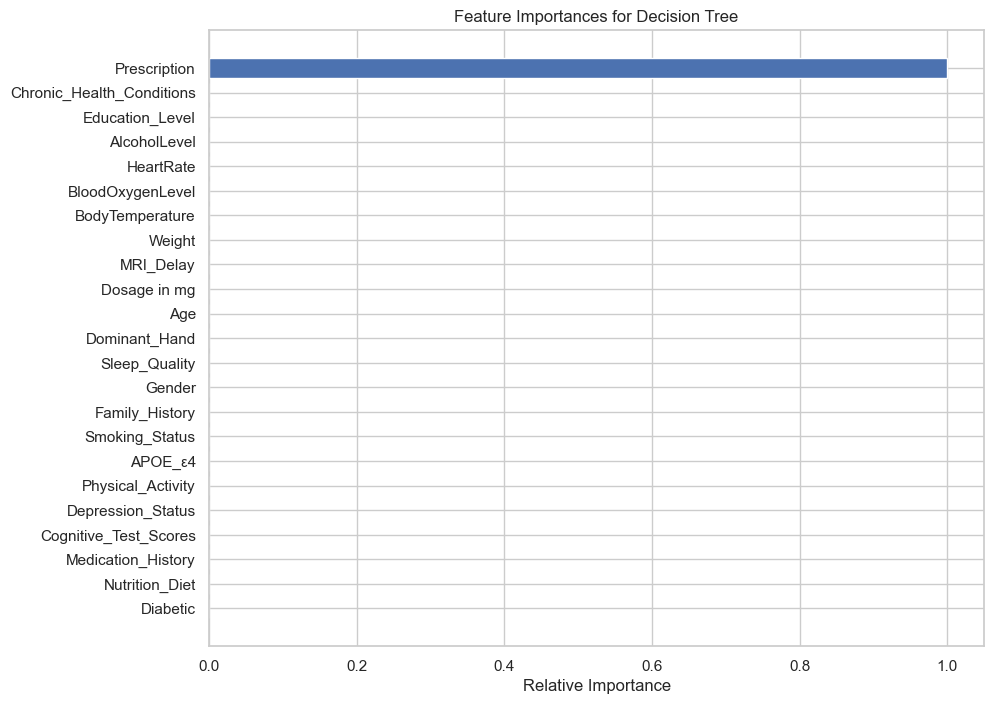

In [31]:
# Getting the most important features for Decision Tree
features = dementia_df.columns
importances = DT.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 8))
plt.title('Feature Importances for Decision Tree')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()